<a href="https://colab.research.google.com/github/rkmaccha/myLearningNotes/blob/main/Standardisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
df= pd.read_csv('/content/mydrive/MyDrive/MachineLearning_Journey/dataset/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.iloc[ : , 2:]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X= df.iloc[ : , :-1]
y= df.iloc[ : ,-1]

In [8]:
X.shape

(400, 2)

In [9]:
y.shape

(400,)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
X_train.shape

(280, 2)

In [12]:
X_test.shape

(120, 2)

In [13]:
y_train.shape

(280,)

In [14]:
y_test.shape

(120,)

### Standard Scalar -> Standardize features by removing the mean and scaling to unit variance. Centering and scaling happen independently on each feature.
Mean = 0 <br>
Standard Deviation = 1

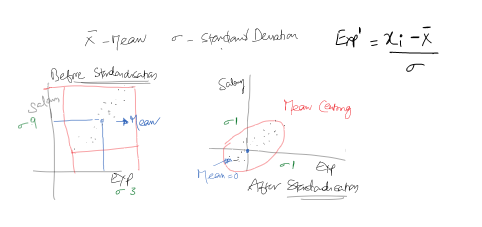

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar= StandardScaler()

We train the StandardScaler with the training data, and later transform both training and test data

In [17]:
scalar.fit(X_train)

StandardScaler()

In [18]:
X_train_Scaled = scalar.transform(X_train)
X_test_Scaled = scalar.transform(X_test)

In [19]:
X_train.shape

(280, 2)

In [20]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [21]:
scalar.var_ # squareroot of variance is standard deviation

array([1.04038724e+02, 1.19572709e+09])

The data converts into numpy array after transforming the data using StandardScaler  <br>
We can convert back the data to Dataframe

In [22]:
X_train_Scaled = pd.DataFrame(X_train_Scaled, columns=X_train.columns)
X_test_Scaled = pd.DataFrame(X_test_Scaled, columns=X_test.columns)

In [23]:
X_train_Scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [24]:
X_train_Scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,4.282289e-17,5.075305e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


In [25]:
np.round(X_train_Scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Visualise the Effects -> Before and After the scaling

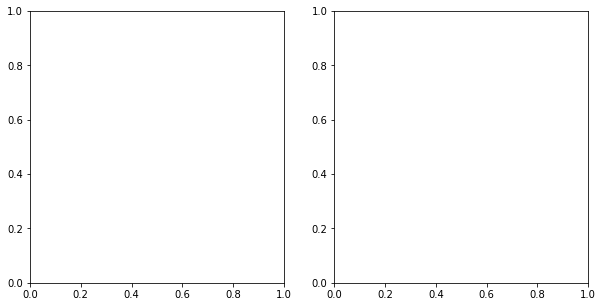

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

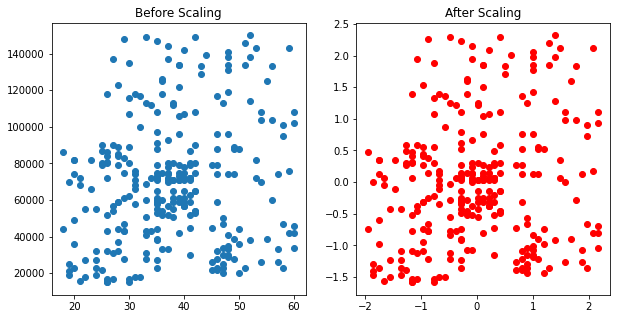

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
#=======================================================
axes[0].set_title("Before Scaling")
axes[0].scatter(X_train['Age'],X_train['EstimatedSalary'])
#=======================================================
axes[1].set_title("After Scaling")
axes[1].scatter(X_train_Scaled['Age'],X_train_Scaled['EstimatedSalary'],color= 'red')
#=======================================================
plt.show()

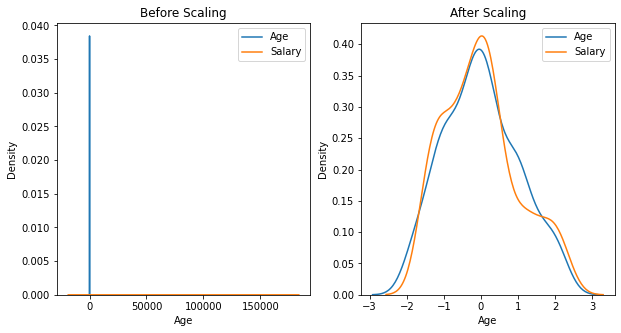

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
#=======================================================
axes[0].set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=axes[0])
sns.kdeplot(X_train['EstimatedSalary'],ax=axes[0])
axes[0].legend(['Age',"Salary"])
#=======================================================
axes[1].set_title("After Scaling")
sns.kdeplot(X_train_Scaled['Age'],ax=axes[1])
sns.kdeplot(X_train_Scaled['EstimatedSalary'],ax=axes[1])
axes[1].legend(['Age',"Salary"])
#=======================================================

plt.show()

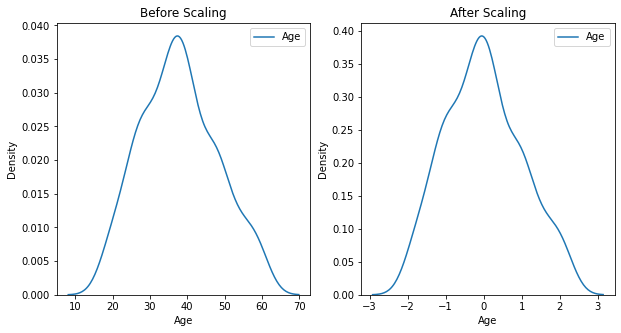

In [51]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
#=======================================================
axes[0].set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=axes[0])
axes[0].legend(['Age'])
#=======================================================
axes[1].set_title("After Scaling")
sns.kdeplot(X_train_Scaled['Age'],ax=axes[1])
axes[1].legend(['Age'])
#=======================================================
plt.show()

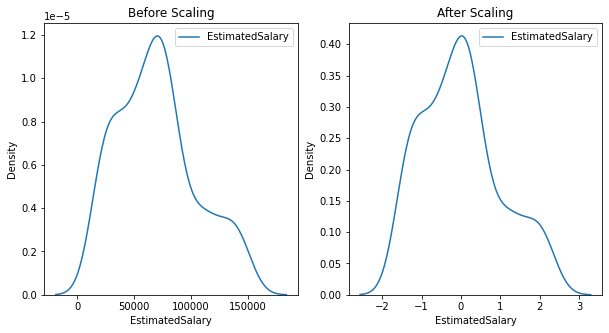

In [52]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
#=======================================================
axes[0].set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=axes[0])
axes[0].legend(['EstimatedSalary'])
#=======================================================
axes[1].set_title("After Scaling")
sns.kdeplot(X_train_Scaled['EstimatedSalary'],ax=axes[1])
axes[1].legend(['EstimatedSalary'])
#=======================================================
plt.show()

Why should I Scale the values ? 

### Impact of Scaling on Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
Lr= LogisticRegression()
Scaled_Lr= LogisticRegression()

In [57]:
Lr.fit(X_train,y_train)
Scaled_Lr.fit(X_train_Scaled,y_train)

LogisticRegression()

In [58]:
y_pred= Lr.predict(X_test)
Scaled_y_pred= Scaled_Lr.predict(X_test_Scaled)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,y_pred)

0.6583333333333333

In [61]:
accuracy_score(y_test,Scaled_y_pred)

0.8666666666666667

### Impact of Scaling on DecesionTree 

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DTC= DecisionTreeClassifier()
Scaled_DTC= DecisionTreeClassifier()

In [64]:
DTC.fit(X_train,y_train)
Scaled_DTC.fit(X_train_Scaled,y_train)

DecisionTreeClassifier()

In [65]:
y_pred= DTC.predict(X_test)
Scaled_y_pred= Scaled_DTC.predict(X_test_Scaled)

In [66]:
accuracy_score(y_test,y_pred)

0.875

In [67]:
accuracy_score(y_test,Scaled_y_pred)

0.8666666666666667

What algorithms need feature scaling, beside from SVM?

https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm
<br>
https://www.dataschool.io/comparing-supervised-learning-algorithms/


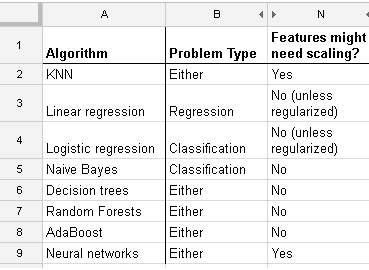

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35